## Testing the Python implementation of PDM

In [118]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import hvplot
import hvplot.pandas

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
pad = Path(os.getcwd())
pad.name

'Python'

Set Path to the above folder = the main Python folder

In [120]:
if pad.name != "Python":
    pad_correct = Path("../../Python")
    os.chdir(pad_correct)
from functions.PDM import PDM

In [121]:
area = pd.read_csv('matlab/data/Area.csv', header= None, dtype = np.float32)
A = area.values
display(area)
display(A)

,0
0,385.0


array([[385.]], dtype=float32)

In [122]:
colnames = ['cmax','cmin','b','be','k1','k2','kb',
            'kg','St','bg','tdly','qconst','rainfac']
parameters = pd.read_csv('matlab/data/paramPDM.csv', names = colnames, header = None,
dtype = np.float32)
parameters

,cmax,cmin,b,be,k1,k2,kb,kg,St,bg,tdly,qconst,rainfac
0,354.700012,0.001,0.1225,1.0,40.0,15.0,2642.0,5513.0,0.0,1.0,7.0,-0.5306,0.0


In [123]:
P = pd.read_csv("matlab/data/P.csv", names = ['P'], dtype = np.float32)

In [124]:
EP = pd.read_csv("matlab/data/EP.csv", names = ['EP'], dtype = np.float32)

In [125]:
time = pd.date_range(start = '01/01/1971', end = '31/12/2000', freq = 'H')
print(type(time))
time

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


c:\Users\olivi\miniconda3\envs\thesis\lib\site-packages\IPython\core\interactiveshell.py:3398: UserWarning: Parsing '31/12/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


DatetimeIndex(['1971-01-01 00:00:00', '1971-01-01 01:00:00',
               '1971-01-01 02:00:00', '1971-01-01 03:00:00',
               '1971-01-01 04:00:00', '1971-01-01 05:00:00',
               '1971-01-01 06:00:00', '1971-01-01 07:00:00',
               '1971-01-01 08:00:00', '1971-01-01 09:00:00',
               ...
               '2000-12-30 15:00:00', '2000-12-30 16:00:00',
               '2000-12-30 17:00:00', '2000-12-30 18:00:00',
               '2000-12-30 19:00:00', '2000-12-30 20:00:00',
               '2000-12-30 21:00:00', '2000-12-30 22:00:00',
               '2000-12-30 23:00:00', '2000-12-31 00:00:00'],
              dtype='datetime64[ns]', length=262969, freq='H')

In [126]:
time_daily = pd.date_range(start = time[0], end = time[-1], freq ='4D')
time_daily

DatetimeIndex(['1971-01-01', '1971-01-05', '1971-01-09', '1971-01-13',
               '1971-01-17', '1971-01-21', '1971-01-25', '1971-01-29',
               '1971-02-02', '1971-02-06',
               ...
               '2000-11-24', '2000-11-28', '2000-12-02', '2000-12-06',
               '2000-12-10', '2000-12-14', '2000-12-18', '2000-12-22',
               '2000-12-26', '2000-12-30'],
              dtype='datetime64[ns]', length=2740, freq='4D')

In [127]:
observations = pd.read_csv(Path("matlab/output/Qmod.csv"), names = ["Q_obs"])
observations.shape

(3732, 1)

## Calling the function and comparing with matlab function and observed data

In [131]:
deltat = 1
deltat_out = 24
time_in = time[:len(P.values)]
qmod, tmod, Cstar, qbm3s, qsm3s, Eiacc = PDM(P.values, EP.values, time_in, A,deltat, deltat_out, parameters)

Loading in matlab output

In [129]:
tmod

DatetimeIndex(['1971-01-01 00:00:00', '1971-01-01 01:00:00',
               '1971-01-01 02:00:00', '1971-01-01 03:00:00',
               '1971-01-01 04:00:00', '1971-01-01 05:00:00',
               '1971-01-01 06:00:00', '1971-01-01 07:00:00',
               '1971-01-01 08:00:00', '1971-01-01 09:00:00',
               ...
               '1981-03-20 14:00:00', '1981-03-20 15:00:00',
               '1981-03-20 16:00:00', '1981-03-20 17:00:00',
               '1981-03-20 18:00:00', '1981-03-20 19:00:00',
               '1981-03-20 20:00:00', '1981-03-20 21:00:00',
               '1981-03-20 22:00:00', '1981-03-20 23:00:00'],
              dtype='datetime64[ns]', length=89568, freq='H')

In [130]:
qmod_pd = pd.read_csv("matlab/output/Qmod.csv", dtype = np.float32, header = None,names = ['Matlab'])
pd_qmod_obs = pd.read_csv("matlab/data/observations.csv", dtype = np.float32, header = None, names = ['Observed'])
qmod_matlab = qmod_pd['Matlab'].values
qmod_obs = pd_qmod_obs['Observed'].values
qmod_pd['Python'] = qmod[:-1]
qmod_pd['Observed'] = pd_qmod_obs
qmod_pd['Time'] = tmod
display(qmod_pd)

ValueError: Length of values (89591) does not match length of index (3732)

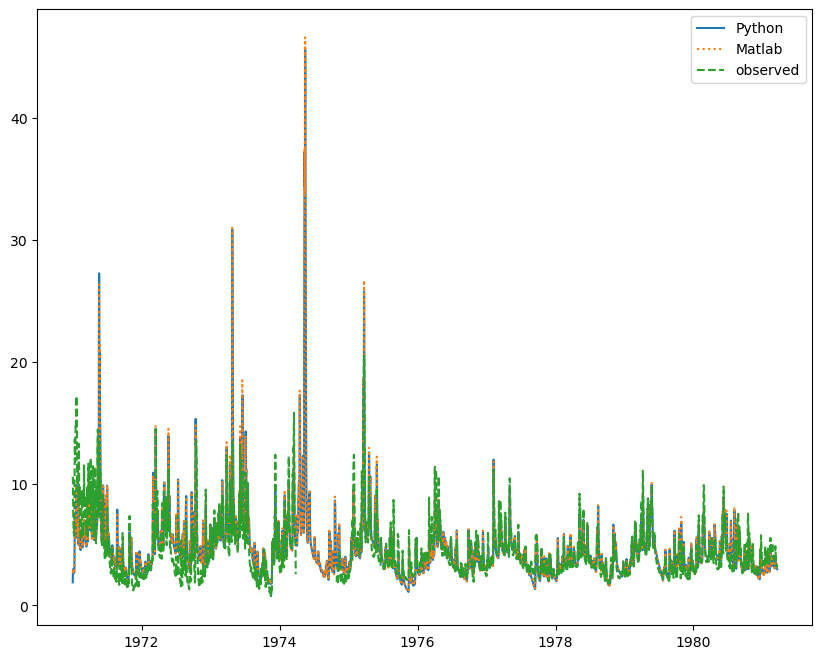

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(tmod, qmod[:-1], label = 'Python')
ax.plot(tmod, qmod_matlab, linestyle = 'dotted', label ='Matlab')
ax.plot(tmod, qmod_obs, linestyle = 'dashed', label = 'observed')
ax.legend()

In [ ]:
qmod_pd.hvplot.line(x = 'Time', y = ['Matlab','Python','Observed'],height = 500, width = 800)


:NdOverlay   [Variable]
   :Curve   [Time]   (value)

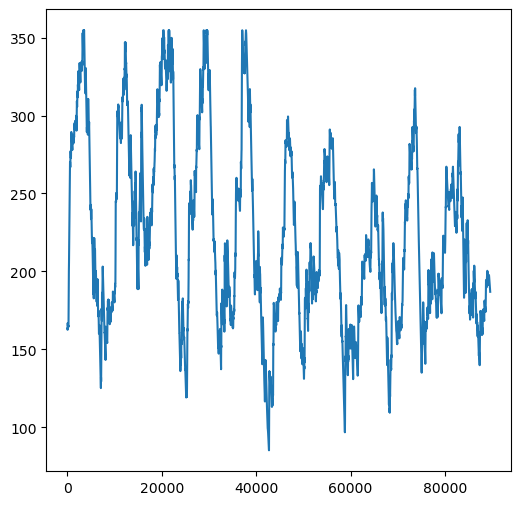

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(Cstar)

In [ ]:
#fig, ax = plt.subplots(figsize = (6,6))
#ax.plot(S1)

In [ ]:
#fig, ax = plt.subplots(figsize = (6,6))
#ax.plot(V)

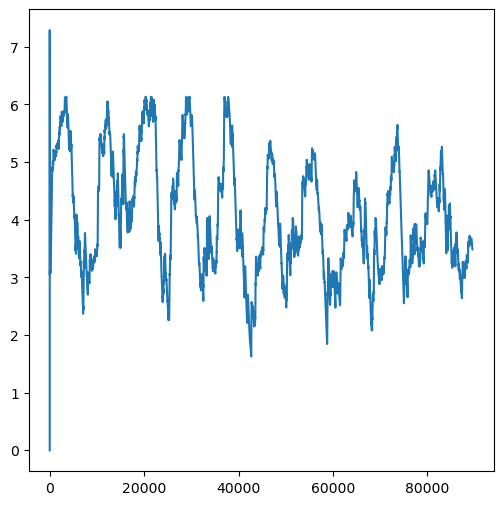

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(qbm3s)

In [ ]:
#fig, ax = plt.subplots(figsize = (6,6))
#ax.plot(S3)

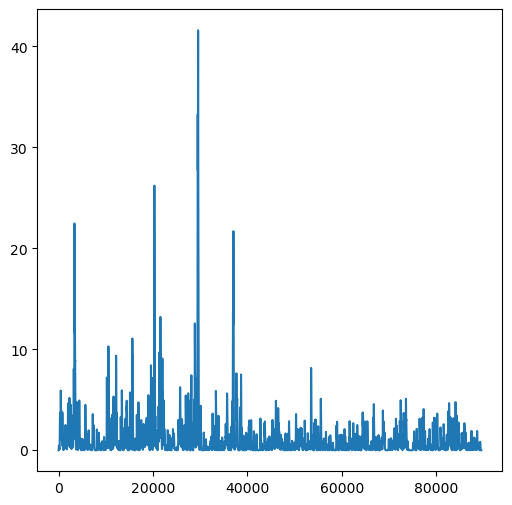

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(qsm3s)

In [ ]:
#fig, ax = plt.subplots(figsize = (6,6))
#ax.plot(di)

## Mass Balance

All evapotranspiration and precipitation data are expressed in mm/h and are valid for deltat = 1 hour

In [ ]:
total_actual_EP = np.sum(Eiacc)
total_P = np.sum(P.values)
total_qm3= np.sum(qmod)*24*3600 #as each value is the average flow for 24hours
total_qmod = total_qm3*1000/(A*1000**2) #m^3/m^2 and then *1000 for m-> mm
total_net_rain = total_P -total_actual_EP
print(total_net_rain, total_qmod)

4352.092 [[3886.17662338]]


c:\Users\olivi\miniconda3\envs\thesis\lib\site-packages\numpy\lib\stride_tricks.py:537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
c:\Users\olivi\miniconda3\envs\thesis\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


<BarContainer object of 4 artists>

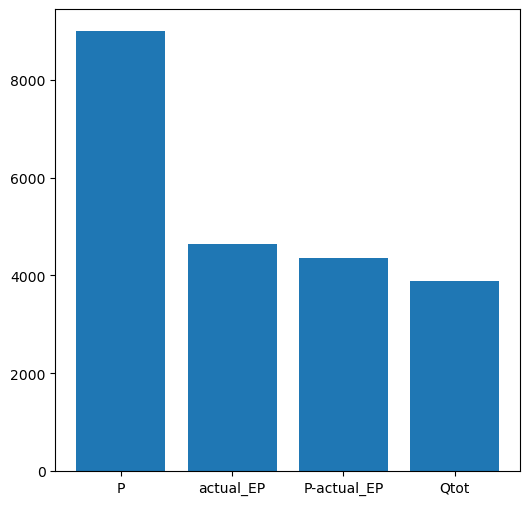

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
ax.bar(x = ['P','actual_EP','P-actual_EP','Qtot'],height = [total_P, total_actual_EP, total_net_rain, total_qmod])

c:\Users\olivi\miniconda3\envs\thesis\lib\site-packages\numpy\lib\stride_tricks.py:537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
c:\Users\olivi\miniconda3\envs\thesis\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


<BarContainer object of 2 artists>

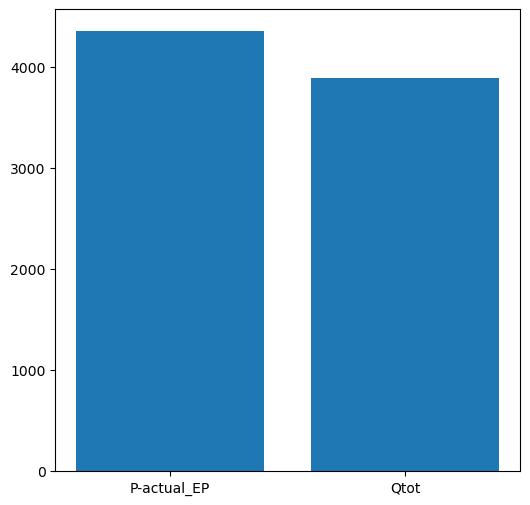

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
ax.bar(x = ['P-actual_EP','Qtot'],height = [total_net_rain, total_qmod])